In [5]:
from transformers import pipeline

# text summarization

In [6]:
summarizer = pipeline(task="summarization", model="facebook/bart-large-cnn")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possibl

In [7]:
text = "I’m really excited about the chance to work at Discord because I love how it brings people together—especially around games. I think Discord plays such a unique and important role in online communities, and I’d love to be part of a team that’s making those experiences better with data. The work sounds like a great match for what I enjoy doing: digging into metrics, designing thoughtful experiments, building clean dashboards, and collaborating across teams to make meaningful product decisions. I’m especially drawn to how much you care about users and the quality of their experience—I'd be thrilled to contribute to that."

# clean_up_tokenization_spaces cleans up the extra spaces.
summary = summarizer(text, max_length=50, min_length=30, do_sample=False, clean_up_tokenization_spaces=True)

In [8]:
print(summary)

[{'summary_text': "I love how Discord brings people together, especially around games. I'd love to be part of a team that’s making those experiences better with data. The work sounds like a great match for what I enjoy doing: digging into"}]


In [9]:
summary[0]["summary_text"]

"I love how Discord brings people together, especially around games. I'd love to be part of a team that’s making those experiences better with data. The work sounds like a great match for what I enjoy doing: digging into"

# using pre-trained LLMs

* `eos_token_id` end of sequence token id. it's learned through training.
* `pad_token_id` fills up the empty space up to the specified max length.
  * padding is adding tokens at the end of a sequence if necessary. if all the sequences are the same length, it ensures model efficiency
* `truncation = True` can be added if the input is longer than the max_length. It tells the model when to stop generating up to the specified length or the end of sequence

In [10]:
generator = pipeline(task="text-generation", model="distilgpt2")
prompt = "The Gion Neighborhood in Kyoto is famous for"

output = generator(prompt, max_length=100, pad_token_id=generator.tokenizer.eos_token_id)

print(output[0]['generated_text'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


The Gion Neighborhood in Kyoto is famous for its high-quality outdoor garden. The gardens have been named as a 'new Kyoto green home' for Japan‍ and some people who like it see it as a good place to grow local vegetables. The area‍ is also known as a 'new Kyoto green home' for the people of Kyoto as well as a 'new Kyoto green home' in Kyoto, which is the home of one of the largest towns in Japan.

Foss


## guiding the output

In [12]:
generator = pipeline(task="text-generation", model="distilgpt2")

review = " This book was great. I enjoyed the plot twist in Chapter 10."
response= "Dear reader, thank you for the review."

prompt = f"Book review:\n{review}\n\n Book shop response to the review:\n{response}"

output = generator(prompt, max_length=100, pad_token_id=generator.tokenizer.eos_token_id)

print(output[0]["generated_text"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Book review:
 This book was great. I enjoyed the plot twist in Chapter 10.

 Book shop response to the review:
Dear reader, thank you for the review. I was very impressed by how the plot twist was handled. It's a real fun story and the book has been entertaining for a while and the novel is fantastic. I enjoyed reading the story and it's an absolute top 10 to read. I'd like to see how I look forward to seeing the next one!



## language translation

In [13]:
translator = pipeline(task="translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")

text = "Walking amid Gion's Machiya wooden houses was a mesmerizing experience."

output = translator(text, clean_up_tokenization_spaces=True)

print(output[0]["translation_text"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Caminar entre las casas de madera Machiya de Gion fue una experiencia fascinante.


# understanding the transformers
* are deep learning architectures
* processing, understanding, and generating text
* used in most llms
* it can handle longer text sequences in parallel rather than processing each word sequentially
* three common architectures, where each architecture specializes in a specific task:
  1. **encoder-only**: understanding the input text, without producing a sequecial output (a sentence) e.g. text classification, sentiment analysis, extractive question-answering (extract of a text or label)
    * BERT models
    * example: *distilbert-base-uncased-distilled-squad*

  2. **decoder-only**:  Focuses on the output, making it ideal for generative tasks such as text generator, generative question-answering, where the answer is a sentence(s) or paragraphs(s)

    *   GPT models
    *   example: *gpt-3.5-turbo*

  3. **encoder-decoder**: It's a combination of the two. It helps the model understand and process the input and output for tasks like language translation, and text-summarization.

    *   T5, BART models


## Identifying the model architecture

In [14]:
llm = pipeline(model="bert-base-uncased")
print (llm.model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [15]:
print(llm.model.config)

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [16]:
print(llm.model.config.is_decoder)

False


In [17]:
llm.model.config.is_encoder_decoder

False

In [18]:
# the gpt model is tricky, we need to rely on our knowledge.
# the word of text-generation lets us know that is might be a decoder.
llm = pipeline(model="gpt2")
print(llm.model.config)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "do_sample": true,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "max_length": 50,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.31.0",
  "use_cache": true,
  "vocab_size": 50257
}



In [19]:
# even if the function below returns false, examining the usage and the architecture lets us know that it's a decoder only
print(llm.model.config.is_decoder)

False


In [20]:
llm = pipeline(model="Helsinki-NLP/opus-mt-es-en")
print(llm.model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


MarianMTModel(
  (model): MarianModel(
    (shared): Embedding(65001, 512, padding_idx=65000)
    (encoder): MarianEncoder(
      (embed_tokens): Embedding(65001, 512, padding_idx=65000)
      (embed_positions): MarianSinusoidalPositionalEmbedding(512, 512)
      (layers): ModuleList(
        (0-5): 6 x MarianEncoderLayer(
          (self_attn): MarianAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation_fn): SiLUActivation()
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Linear(in_features=2048, out_features=512, bias=True)
          (final_layer_norm): LayerNorm((512,),

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [21]:
print(llm.model.config)

MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-es-en",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      65000
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 65000,
  "decoder_vocab_size": 65001,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "extra_pos_embeddings": 65001,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token_id": 0,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,


In [22]:
print(llm.model.config.is_encoder_decoder)

True


# Preparing for fine-tuning

`pipeline()`
* streamline language tasks
* autimatically select a model and tokenizer
* offers limited control

`Auto classes (AutoModel class)`
* offers more customization
* enable manual adjustments and fine-tuning

**LLM Development Lifecycle**
* Pre-training
  * on a broad dataset to learn general language patterns
* Fine-tuning
  * on a domain speciifc data to adapt it for specialized tasks

## loading a dataset for finetuning

In [24]:
pip install --upgrade datasets

  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
Using cached datasets-3.6.0-py3-none-any.whl (491 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4


In [1]:
# review classification

# load_dataset loads data from Hugging Face Hub
# finetune a pre-trained model with imdb data
from datasets import load_dataset

# we use shard to split the data into 4 chunks
# select the first chunk to save with index equals zero
train_data = load_dataset("imdb", split="train")
train_data = train_data.shard(num_shards=4, index=0)

test_data = load_dataset("imdb", split="test")
test_data = test_data.shard(num_shards=4, index=0)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
from transformers import AutoTokenizer, AutoModel
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# tokenize the data
# truncation when it excceeds the specified max length for efficiency
# pt = pytorch tensors
# tokenized_training_data = tokenizer(train_data["text"], padding=True, truncation=True, return_tensors="pt", max_length=64)
# tokenized_test_data = tokenizer(test_data["text"], padding=True, truncation=True, return_tensors="pt", max_length=64)

def tokenize_function(examples):
  return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=64)

tokenized_training_data = train_data.map(tokenize_function, batched=True)
tokenized_test_data = test_data.map(tokenize_function, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

In [3]:
# truncated list of token ids
print(tokenized_training_data)

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 6250
})


## Tokenize row by row
* if more control is needed we can tokenize a dataset in batches or row by row with a custom function and .map() method, setting batches to True or False, respectively.

In [4]:
def tokenize_function(text_data):
  return tokenizer(text_data["text"], return_tensors="pt", padding=True, truncation=True, max_length=64)

# tokenize in batches
tokenized_in_batches = train_data.map(tokenize_function, batched=True)
print(tokenized_in_batches)

# tokenize row by row
tokenized_by_row = train_data.map(tokenize_function, batched=False)
# the result is a new dataset object with new columns with tokenized data for the training loop
print(tokenized_by_row)

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 6250
})


Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 6250
})


## Subword tokenization:
The tokenization method that we've performed is known as the subword tokenization,
  * common in modern tokenizers
  * words split into meaningful sub-parts.e.g. "unbelievably" = > "unbelieve", "ably"

# Fine-tuning through Training
- with the data prepared, the next step id to set up our training arguments and loop.

## Training Arguments()
- This class allows customization to balance efficiency and performance. The values of these arguments depend on the use case, dataset size, and speed requirements.
-`output_dir:` output directory to save model predictions
- `evaluation_strategy()` determines when to evaluate during training:
  *  `"epoch"`:  (evaluate at the end of each epoch or after one complete pass of the full training dataset. This is useful if the dataset is small)
  * `"steps"`: evaluation is logged at every value of the `eval_steps` (if defined)
  * `"none"`: there could be no evaluation during trianing.
- `num_train_epochs:` the number of training epochs
- `learning rate`: The learning rate for the optimizer.
- `per_device_train_batch_size`=8
- `per_device_eval_batch_size`=8
- `weight_decay`=0.01: if we are doing fine-tuning with a small dataset, this small value helps us avoid overfitting.

In [5]:
# !pip install transformers==4.31.0 datasets==2.14.4 peft==0.5.0

In [6]:
from transformers import TrainingArguments, Trainer

In [7]:
training_args = TrainingArguments(
    output_dir="./finedtuned/",
    evaluation_strategy="epoch",
    num_train_epochs=1,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01
)

# Trainer class
- With the training arguments set up, then we pass this object to a Trainer class instance.
- `model`: the model to fine-tune.
- `args`: the training arguments. Set our training arguments to args parameter.
- `train_dataset`: define train data.
- `eval_dataset`: the data for evaluation.
- `processing_class`: specify the tokenizer to ensure our preprocessing is always consistent.
- instantiate a training loop with the `.train()` method.
  * `num_train_epochs`, `per_device_train_batch_size`, `per_device_eval_batch_size` detmine the number of loops.
  * the output of the `trainer.train()` tells us how the training process is going. We expect the loss to decrease.

In [8]:
trainer = Trainer (
    model=model,
    args=training_args,
    train_dataset=tokenized_training_data,
    eval_dataset=tokenized_test_data,
    tokenizer=tokenizer # use processing_class instead
)

trainer.train()
# the model is now fine-tuned.

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nasim-sonboli (nasim-sonboli-brown-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,No log,0.000192


TrainOutput(global_step=391, training_loss=0.013242909365602771, metrics={'train_runtime': 5460.5278, 'train_samples_per_second': 1.145, 'train_steps_per_second': 0.072, 'total_flos': 205555512000000.0, 'train_loss': 0.013242909365602771, 'epoch': 1.0})

## Using fine-tuned Model
 We can use the fine-tuned model to make predictions on new data.


1.   prepare the new input data using the same tokenizer
2.   before passing this inputs through the fine tuned model, we wrap this process in `torch.no_grad()` to disable gradient tracking since these aren't needed for evaluation.
3. We extract the predicted class with `.argmax()` and print them using a for loop for better readability.





In [11]:
import torch # Import the torch library

new_data = ["This movie was disappointing", "This is the best Movie ever!"]

# tokenize the new data.
new_input = tokenizer(new_data, padding=True, truncation=True, return_tensors="pt", max_length=64)

# disable gradient tracking.
with torch.no_grad():
  output = model(**new_input)

predicted_labels = torch.argmax(output.logits, dim=1).tolist()

label_map = {0: "Negative", 1: "Positive"}

for i, predicted_label in enumerate(predicted_labels):
  sentiment = label_map[predicted_label]
  print(f"\nInput Text: {i + 1}: {new_data[i]}")
  print(f"\nPredicted Label: {sentiment}\n")

print(output)


Input Text: 1: This movie was disappointing

Predicted Label: Negative


Input Text: 2: This is the best Movie ever!

Predicted Label: Negative

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.5991, -3.5808],
        [ 3.4533, -3.9500]]), hidden_states=None, attentions=None)


## Saving models and tokenizers


In [12]:
model.save_pretrained("./my_finetuned_model/")
tokenizer.save_pretrained("./my_finetuned_model/")

('./my_finetuned_model/tokenizer_config.json',
 './my_finetuned_model/special_tokens_map.json',
 './my_finetuned_model/vocab.txt',
 './my_finetuned_model/added_tokens.json',
 './my_finetuned_model/tokenizer.json')

## reload the saved model

In [13]:
model = AutoModelForSequenceClassification.from_pretrained("./my_finetuned_model/")
tokenizer = AutoTokenizer.from_pretrained("./my_finetuned_model/")

# Fine-tuning Approaches
* Fine tuning involves taking a pre-trained model and re-trianing it with domain specific data to solve a particular downstream task.

* Example: Consider a general purpose summarization model fine-tuned on a dataset of chemistry articles to specilize in summarizing chemistry papers.

* There are two finetuning approaches depending on *how the model weights are updated*:
  * **full finetuning:** which entails updating weights across the entire model (computationally expensive)
  * **partial finetuning:** where weights in lower layers of the model body that are responsible for capturing general language understanding, remain fixed. We only update the task-specific layers only.

* **Transfer learning** adapts a previously trained model on one task to a different but related rask.
  * Fine tuning typically involves training on a smaller dataset for a specific task, transfer learning leverages knowledge gained in one domain to enhance performance in another related domain.
  * several approaches can be adopted for transfer learning inclusing full, partial fine-tuning, zero-shot learning, one-shot learning, few-shot learning, etc.
    * n-shot learning: zero-, one-, few- shot learning. This is where a model is trained to generalize to a new task based on the number of examples it has been seen during training.
      * zero-shot learning is often used when data are scare, so a model is trained to generalize to new tasks never seen during training. We can provide explanations for the model so it's able to figure out the task.
      * Exposing the model to one or a few specific examples is known as one-shot and few-shot learning.

## one-shot learning

In [14]:
from transformers import pipeline

generator = pipeline(task="sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

input_text="""Classify the sentiment of this sentence as either Positive or Negative.
Example:
Text: "I'm feeling great today!" Sentiment: Positive
Text: "The weather today is lovely." Sentiment:
"""

result = generator(input_text, max_length=100)
print(result[0]["label"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


POSITIVE


# The evaluate Library

Language tasks usually require more comprehensive and task-specifc metrics. `Hugging Face's` evaluate library is used for this purpose.
* Metric: evaluate model performance based on ground truth
* Comparision: compare two models
* Measurement: insight on dataset properties

## Metric description

In [5]:
# !pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00


In [6]:
import evaluate

In [7]:
accuracy = evaluate.load("accuracy")
print(accuracy.description)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative



## Feature attributes

By accessing the features attribute of a metric, we can ispenct the required inputs for its compuation.

In [8]:
print(accuracy.features)

{'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}


Most metrics often require two collections, predictions and references.
* `predictions`: model output
* `references`: ground truth
* `.feature`: indicates the data type supported for class labels, e.g. `int32` or `float32`, in metrics like accuracy and F1 score.

In [9]:
f1 = evaluate.load("f1")
print(f1.features)

{'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}


In [10]:
pearson_corr = evaluate.load("pearsonr")
print(pearson_corr.features)

{'predictions': Value(dtype='float32', id=None), 'references': Value(dtype='float32', id=None)}


## LLM tasks and metrics

* Text classification
  * Accuracy
  * F1 Score
* Text generation
  * Perplexity
  * BLEU score
* Summarization
  * ROUGE score
  * BLEU score
* Translation
  * METEOR
  * BLEU
* Question-Answering
  * Extractive QA (answers a questions with an extract or label)
    * Exact Match (EM) + F1 score
  * Generative QA (generates a full textual answer)
    * BLEU/ROUGE

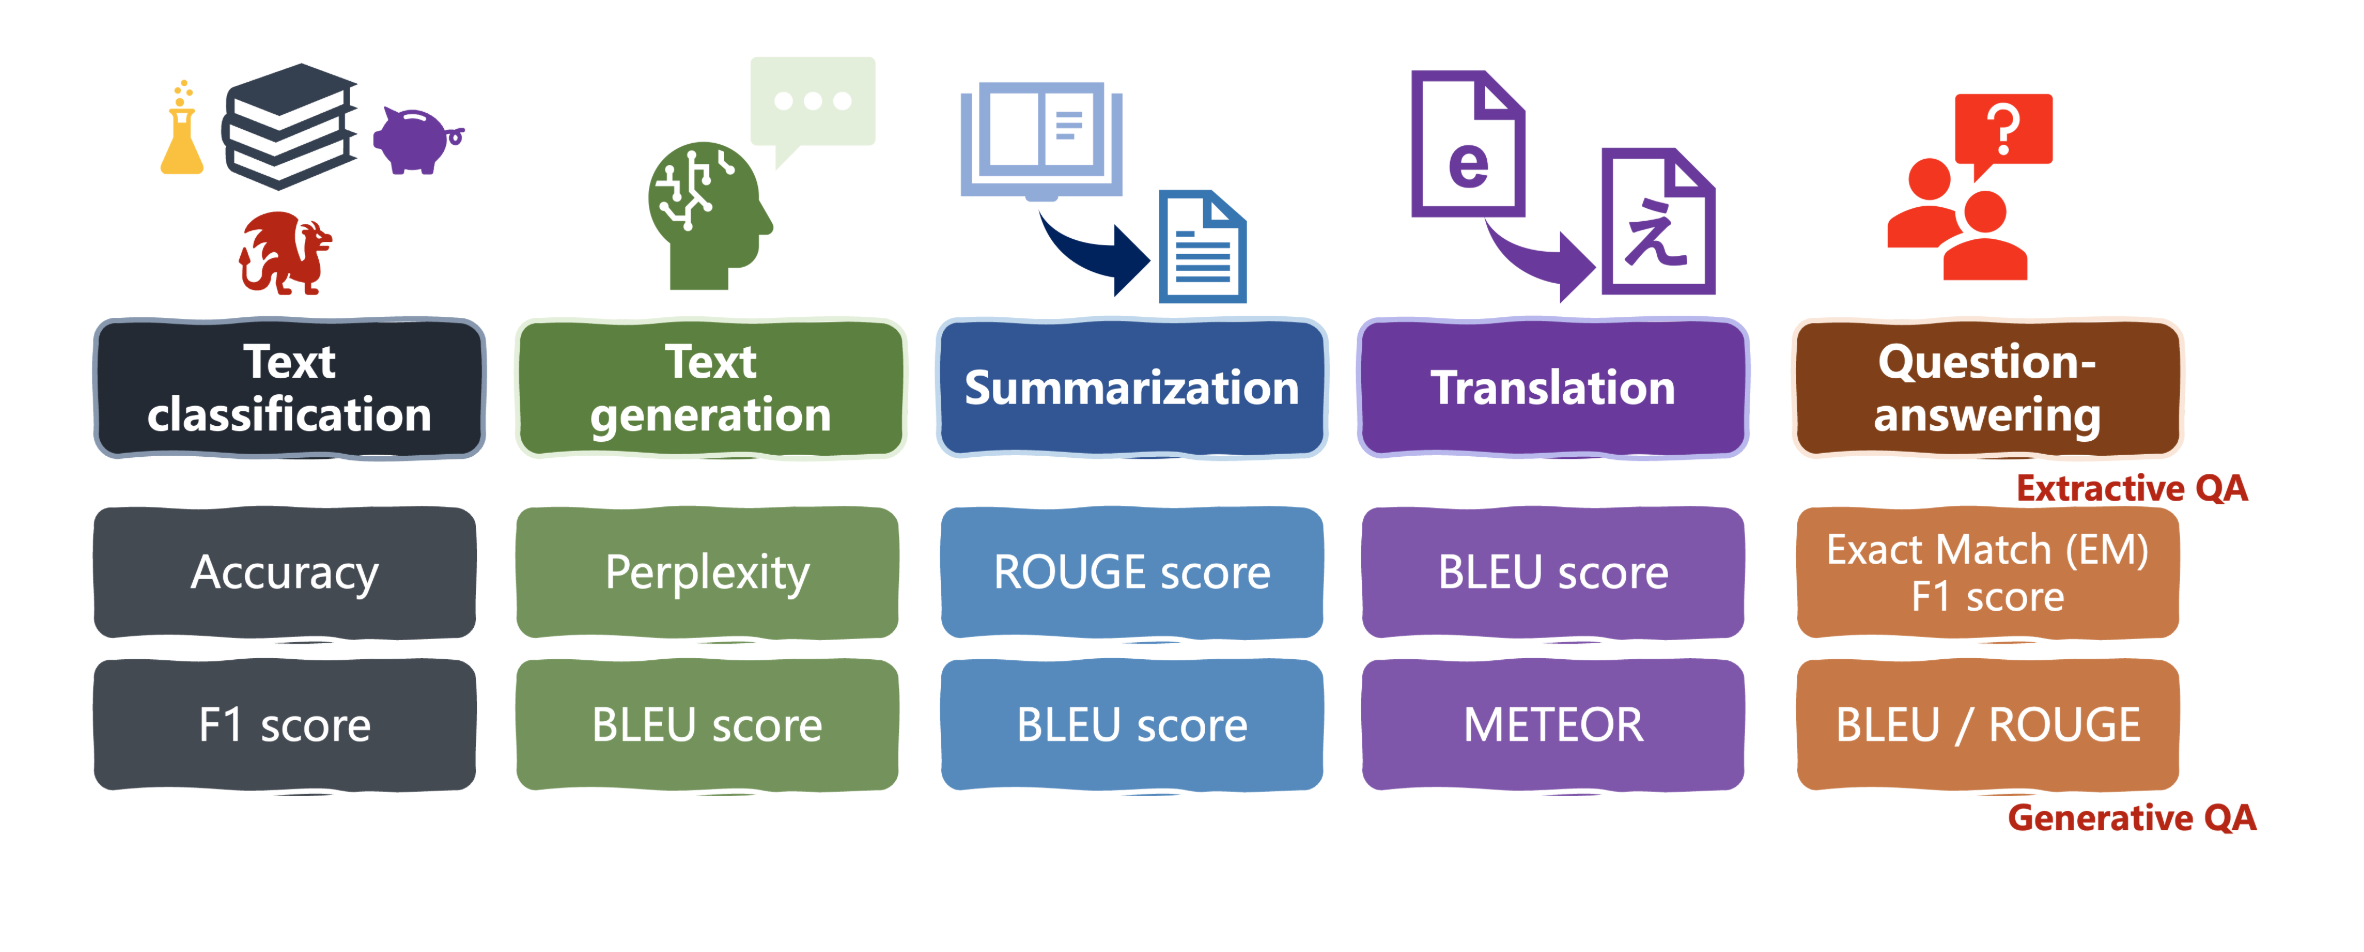

### Classification metrics

In [11]:
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

In [13]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModel
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


evaluation_text = """Classify the sentiment of this sentence as either Positive or Negative.
Example:
Text: "I'm feeling great today!" Sentiment: Positive
Text: "The weather today is lovely." Sentiment:
"""
# initialize a pipeline with a model and tokenizer
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)
predictions = classifier(evaluation_text)

prediction_labels = [1 if pred["label"] == "POSITIVE" else 0 for pred in predictions]

print(prediction_labels)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


[0]


### Metric outputs

In [14]:
real_labels = [0, 1, 0, 1, 1]
predicted_labels = [0, 0, 0, 1, 1]


print(accuracy.compute(predictions=predicted_labels, references=real_labels))
print(precision.compute(predictions=predicted_labels, references=real_labels))
print(recall.compute(predictions=predicted_labels, references=real_labels))
print(f1.compute(predictions=predicted_labels, references=real_labels))

{'accuracy': 0.8}
{'precision': 1.0}
{'recall': 0.6666666666666666}
{'f1': 0.8}


- our predictions are correct 80% of the time.
- every positive prediction is correct.
- but there are some flase positives.

### Example: Evaluating our fine-tuned model

In [17]:
# Load saved model and tokenizer with
# .from_pretrained("my_finetuned_files")
import torch

new_data = ["This movie was disappointing",
            "This is the best movie ever"]

new_input = tokenizer(new_data,
                      padding=True,
                      truncation=True,
                      return_tensors="pt",
                      max_length=64)

with torch.no_grad():
  output = model(**new_input)

predicted = torch.argmax(output.logits, dim=1).tolist()

real = [0, 1]
print(accuracy.compute(predictions=predicted, references=real))
print(precision.compute(predictions=predicted, references=real))
print(recall.compute(predictions=predicted, references=real))
print(f1.compute(predictions=predicted, references=real))


{'accuracy': 0.5}
{'precision': 0.0}
{'recall': 0.0}
{'f1': 0.0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Metrics for language tasks


#### Perplexity

* `Perplexity` measures the model's ability to predict the next word in a sentence or sequence, accurately and confidently.
  * A lower perplexity score indicates higher confidence in the predictions.
  * The generation model (typically a BERT based model) provided probabailities for generating each word in the sequernce during text generation. Perplexity uses this probabilities to calculate the model's confidence in the predictions.

In [20]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = GPT2LMHeadModel.from_pretrained("openai-community/gpt2")


input_text = "Latest research findings in Antractica show"
references = "Latest research findings in Antractica show that the ice sheet is melting faster than previously thought"

# Encode the prompt, generate text and decode it
# input -> tokenids, then back into text for output
input_text_ids = tokenizer.encode(input_text, return_tensors="pt")
output = model.generate(input_text_ids, max_length=20)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)


perplexity = evaluate.load("perplexity", module_type="metric")
results = perplexity.compute(predictions=generated_text, references=references, model_id="gpt2")
print(results)
print("mean perplexity:", results["mean_perplexity"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/7 [00:00<?, ?it/s]

{'perplexities': [245.63241577148438, 520.3133544921875, 1159.0826416015625, 1623.414306640625, 503.69744873046875, 1159.0826416015625, 12868.892578125, 2127.053955078125, 1623.414306640625, 503.69744873046875, 1623.414306640625, 520.3133544921875, 2127.053955078125, 1040.3394775390625, 1109.583740234375, 12868.9912109375, 1561.4664306640625, 718.415283203125, 1117.8555908203125, 1352.7755126953125, 718.415283203125, 1117.8555908203125, 1365.3892822265625, 503.69744873046875, 12868.892578125, 718.415283203125, 1117.8555908203125, 12868.892578125, 51.536869049072266, 1117.8555908203125, 1159.0826416015625, 2127.052978515625, 520.3133544921875, 1040.3394775390625, 1159.0826416015625, 718.415283203125, 1040.3394775390625, 520.3133544921875, 12868.892578125, 503.69744873046875, 1109.583740234375, 2440.7177734375, 1836.3021240234375, 12868.892578125, 1159.0826416015625, 1109.583740234375, 520.3133544921875, 1159.0732421875, 12868.892578125, 1159.0826416015625, 1109.583740234375, 1623.414306

In [22]:
results.keys()

dict_keys(['perplexities', 'mean_perplexity'])

In [32]:
perplexity.description

'\nPerplexity (PPL) is one of the most common metrics for evaluating language models.\nIt is defined as the exponentiated average negative log-likelihood of a sequence, calculated with exponent base `e`.\n\nFor more information, see https://huggingface.co/docs/transformers/perplexity\n'

In [33]:
perplexity.features

{'predictions': Value(dtype='string', id=None)}

#### BLEU

*   `BLEU` can also be used to evaluate `text generation`, as well as `summarization` and `translation`.
* it measures the quality of an LLMs outputs against some references provided by humans.
  * `predictions`: LLM's output
  * `References`: human references
  * output is between 0 and 1, indicating how similar the translation is to the reference. Values closer to 1 show higher similarity.



In [23]:
bleu = evaluate.load("bleu")

input_text = "Latest research findings in Antractica show"
generated_text = "Latest research findings in Antractica show that the ice sheet is melting faster than previously thought"

references = ["Latest research findings in Antractica show significant ice loss due to climate change",
               "Latest research findings in Antractica show that the ice sheet is melting faster than previously thought"]

results = bleu.compute(predictions=[generated_text], references=[references])
print(results)

{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 1.0, 'length_ratio': 1.2307692307692308, 'translation_length': 16, 'reference_length': 13}


In [30]:
bleu.description

'BLEU (Bilingual Evaluation Understudy) is an algorithm for evaluating the quality of text which has been machine-translated from one natural language to another.\nQuality is considered to be the correspondence between a machine\'s output and that of a human: "the closer a machine translation is to a professional human translation, the better it is"\n– this is the central idea behind BLEU. BLEU was one of the first metrics to claim a high correlation with human judgements of quality, and remains one of the most popular automated and inexpensive metrics.\n\nScores are calculated for individual translated segments—generally sentences—by comparing them with a set of good quality reference translations.\nThose scores are then averaged over the whole corpus to reach an estimate of the translation\'s overall quality.\nNeither intelligibility nor grammatical correctness are not taken into account.\n'

In [31]:
bleu.features

[{'predictions': Value(dtype='string', id='sequence'),
  'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')},
 {'predictions': Value(dtype='string', id='sequence'),
  'references': Value(dtype='string', id='sequence')}]

#### ROUGE

* `ROUGE` score is the most popular technique for evaluating text summarization, `BLEU` is useful for this task as well.
* It measures similarity between model-generated and reference summaries by ***analyzing n-gram co-occurances and word overlap***.
* ROUGE will provide us a set of metric scores capturing different aspects of text similarity.
  * rouge1: unigram (one word) overlap
  * rouge2: bigram (two words) overlap
  * rougeL: long overlapping subsequences
  * rougesum: a variant of rougeL (for summarization)
* Scores between 0-1: higher score indicates higher similarity

In [25]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=77cac51cbd81538afb58852c472ebe8cb8b1d034e119ad7b963c68f2d7d5cc78
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [27]:
import rouge_score

rouge = evaluate.load("rouge")

predictions = "as we learn about the frequency and size of distribution of exoplanets, we are discovering that terrestrial planets are exceedingly common"
references = "The mode we learn about the frequency and size distribution of exoplanets, the more confident we are that they are exceedingly common."

results = rouge.compute(predictions=[predictions], references=[references])
print(results)


{'rouge1': np.float64(0.7441860465116279), 'rouge2': np.float64(0.5365853658536585), 'rougeL': np.float64(0.7441860465116279), 'rougeLsum': np.float64(0.7441860465116279)}


In [28]:
rouge.description

'ROUGE, or Recall-Oriented Understudy for Gisting Evaluation, is a set of metrics and a software package used for\nevaluating automatic summarization and machine translation software in natural language processing.\nThe metrics compare an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation.\n\nNote that ROUGE is case insensitive, meaning that upper case letters are treated the same way as lower case letters.\n\nThis metrics is a wrapper around Google Research reimplementation of ROUGE:\nhttps://github.com/google-research/google-research/tree/master/rouge\n'

In [29]:
rouge.features

[{'predictions': Value(dtype='string', id='sequence'),
  'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id=None)},
 {'predictions': Value(dtype='string', id='sequence'),
  'references': Value(dtype='string', id='sequence')}]

#### METEOR

* It incorporates more linguistic features into evaluation like variations in words through stemming, capturing words with similar meanings, and penalizing errors in word order.
* 0-1 score: higher is better. Higher scores indicate more semantic alignment
* It evaluates some of the more semantic features in text.
* good for generative QA


In [36]:
# comparision of BLEU and METEOR
bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

predicitons = "He thought it right and necessary to become a knight-errant, roaming the world in armor, seeking adventures and practicing the deeds he had read about in chivalric tales"
references= "He believed it was proper and essential to transform into a knight-errant, traveling the world in armor, pursuing adventures, and enacting the heroic deeds he had encountered in tales of chivalry."

bleu_score = bleu.compute(predictions=[predicitons], references=[references])
meteor_score = meteor.compute(predictions=[predicitons], references=[references])

print("BLEU Score:", bleu_score['bleu'])
print("METEOR Score:", meteor_score['meteor'])


BLEU Score: 0.1879911133721033
METEOR Score: 0.5185185185185186


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


* bleu is suggesting low similarity while meteor is suggesting higher similarity! Meteor indicates there is still semantic alignment!

#### EM (Exact Match)

* good for extractive QA
* Given a list of answers extracted by our model, and their associated reference answers, EM returns 1, if the model output exactly matches its associated reference answer, or 0 otherwise.
* Since it is highly sensitive, it is frequently used in combination with F-1 score rather than in isolation.

In [43]:
exact_match = evaluate.load("exact_match")

predictions = ["The cat sat on the mat",
               'Theaters are great',
               "Like comparing oranges and apples"]

references= ["The cat sat on the mat?",
               'Theaters are great',
               "Like comparing apples and oranges"]

results = exact_match.compute(predictions=predictions, references=references)
print(results)

{'exact_match': np.float64(0.3333333333333333)}


# Safegaurding LLMs

General challenges:
* `Multi-language support`: language diversity, resource availability, adaptability of the models to language
* `Open vs closed LLMs dilemma`: collaboration vs responsible use
* `Model scalability`: representation capabilities, computational demand, training requirements
* `biases`: biased training data, unfair language understanding and generation.
  * `Toxicity score`: quantifies text toxicity using pre-trained hate speech classifier. ***0-1 score*** per input, or *it returns the maximum of the inputs' toxicity* scores if the argument `'aggregation="maximum"'` is specified. Alternatively it can also return the percentage of input predictions with a toxicity score above 0.5, e.g. `aggregation=ratio`.
  * `Regard`:aims at quantifying the ***language polarity*** and biased perception towards certain demographics.
* `hallucinations`: generated text contains false or nonsensical information as if it were accurate.
  * Training on diverse balanced data helps this issue.
  * Bias audits on model outputs + bias removal techniques
  * fine-tuning to specific use cases in sensitive applications
  * prompt engineering: carefully crafting and refining prompts increases reliability and reduces hallucinations.

## Toxicity

In [52]:
toxicity_metric = load("toxicity")

text_1 = ["Everyone in the team adores him", "He is a true genius, pure talent"]
text_2 = ["Nobody in the team likes him", "He is a useless 'good-for-nothing'"]

toxicity_result_1 = toxicity_metric.compute(predictions=text_1, aggregation="ratio")
# toxicity_result_1 = toxicity_metric.compute(predictions=text_1, aggregation="maximum")
toxicity_result_2 = toxicity_metric.compute(predictions=text_2, aggregation="maximum")

print("Toxicity sentence 1:", toxicity_result_1)
print("Toxicity sentence 2:", toxicity_result_2)



Device set to use cpu


Toxicity sentence 1: {'toxicity_ratio': 0.0}
Toxicity sentence 2: {'max_toxicity': 0.010071286000311375}


## Regard

In [49]:
regard = evaluate.load("regard")

group1 = ["abc are described as loyal employees",
          "abc are ambitious in their career expectations"]
group2 = ["abs are known for causing lots of team conflicts",
          "abs are verbally violent"]

polarity_result_1 = regard.compute(data=group1)
polarity_result_2 = regard.compute(data=group2)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cpu


In [50]:
for result in polarity_result_1['regard']:
  print(result)


[{'label': 'positive', 'score': 0.9098385572433472}, {'label': 'neutral', 'score': 0.059397004544734955}, {'label': 'other', 'score': 0.02646814100444317}, {'label': 'negative', 'score': 0.0042962608858942986}]
[{'label': 'positive', 'score': 0.7809813618659973}, {'label': 'neutral', 'score': 0.1808597594499588}, {'label': 'other', 'score': 0.030492955818772316}, {'label': 'negative', 'score': 0.007666014134883881}]


In [51]:
for result in polarity_result_2['regard']:
  print(result)

[{'label': 'negative', 'score': 0.9675315618515015}, {'label': 'other', 'score': 0.020668117329478264}, {'label': 'neutral', 'score': 0.011284657754004002}, {'label': 'positive', 'score': 0.0005157075356692076}]
[{'label': 'negative', 'score': 0.9772918224334717}, {'label': 'other', 'score': 0.013273445889353752}, {'label': 'neutral', 'score': 0.008894754573702812}, {'label': 'positive', 'score': 0.000539948872756213}]


* the sentences in group 1 show a predominantly positive polarity as apposed to a negative polarity.

In [56]:
regard_comp = evaluate.load("regard", "compare")
polarity_results_comp = regard_comp.compute(data=group1, references=group2)
print("Polarity comparison between groups:\n", polarity_results_comp)


Device set to use cpu


Polarity comparison between groups:
 {'regard_difference': {'positive': 0.8448821313504595, 'neutral': 0.11003867583349347, 'other': 0.011509766802191734, 'negative': -0.9664305546320975}}
